# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Counting Circles, Ellipses and Finding Waldo</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ Mini Project on Counting Circule Blobs <br>
2️⃣ Mini Project on using Template Matching to find Waldo <br>
</p>

In [2]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Counting Circular Blobs** ###

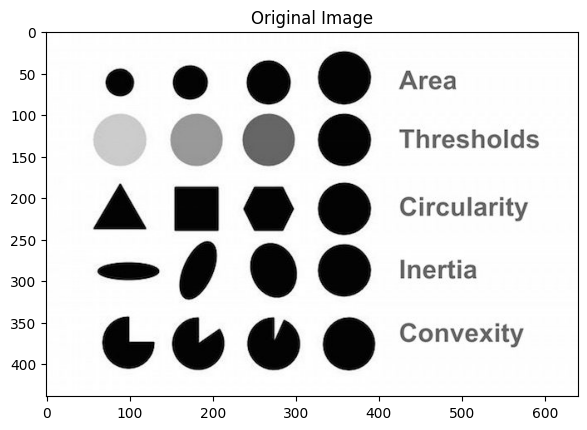

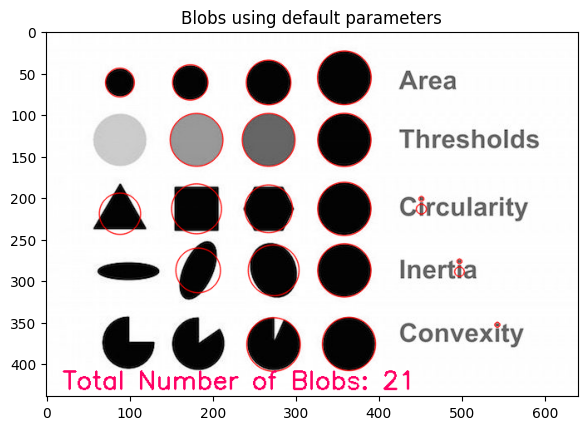

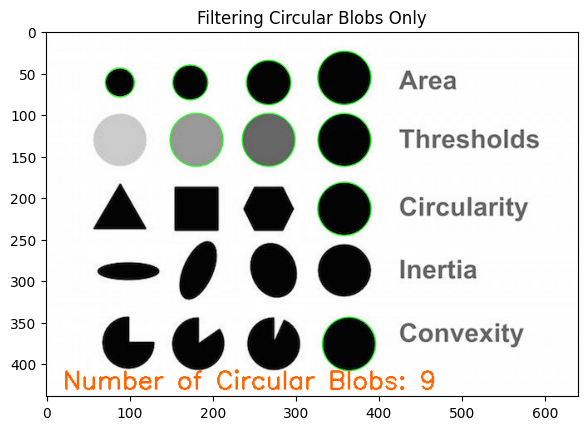

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

# Load image
image = cv2.imread("../images/blobs.jpg")
imshow("Original Image", image)

# Initialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 430), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
imshow("Blobs using default parameters", blobs)

# Set our filtering parameters
# Initialize parameter setting using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0), cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 430), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)

### **Finding Waldo Using Template Matching** ###

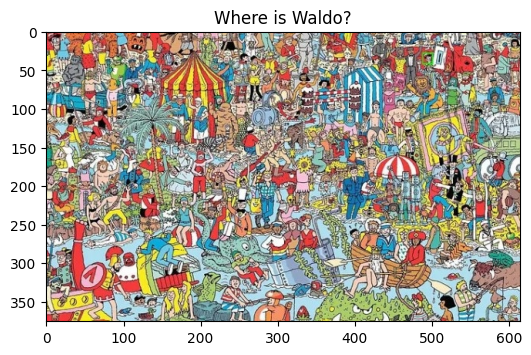

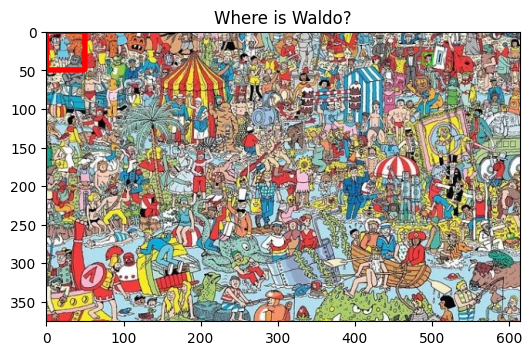

In [3]:
import cv2

# Load input image and convert to grayscale
image = cv2.imread("../images/WaldoBeach.jpg")
imshow("Where is Waldo?", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread("../images/waldo.jpg", 0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

imshow("Where is Waldo?", image)